In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


In [2]:
# ==============================================================
# Define the Black-Scholes pricing function
# ==============================================================
def black_scholes_price(S, K, T, r, sigma, option_type='call'):
    """
    Calculate the price of a European Call or Put option using Black-Scholes formula.

    Parameters:
    S : float - Current stock price (Spot price)
    K : float - Strike price of the option
    T : float - Time to maturity in years
    r : float - Risk-free interest rate (annual, decimal)
    sigma : float - Volatility of the underlying stock (annual, decimal)
    option_type : str - 'call' for call option, 'put' for put option

    Returns:
    float - Price of the option
    """
    # Step 1: Calculate d1 and d2
    # These are intermediary variables used in the Black-Scholes formula
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    # Step 2: Calculate the option price
    if option_type == 'call':
        # Call option formula
        return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        # Put option formula
        return K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    else:
        raise ValueError("option_type must be 'call' or 'put'")

In [3]:
# ==============================================================
# Set initial parameters
# ==============================================================

# Current stock price
S0 = 100
# Strike price of the option
K = 100
# Time to maturity in years
T = 1
# Annual risk-free interest rate (5%)
r = 0.05
# Annual volatility of the stock (20%)
sigma = 0.2

# ==============================================================
# Calculate Call and Put prices
# ==============================================================

call_price = black_scholes_price(S0, K, T, r, sigma, 'call')
put_price = black_scholes_price(S0, K, T, r, sigma, 'put')

print(f"Call option price: {call_price:.4f}")
print(f"Put option price: {put_price:.4f}")

Call option price: 10.4506
Put option price: 5.5735


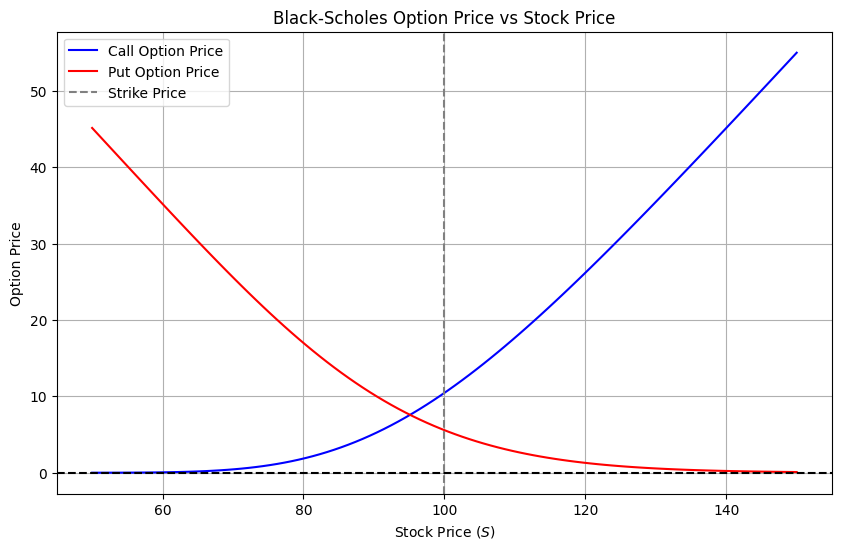

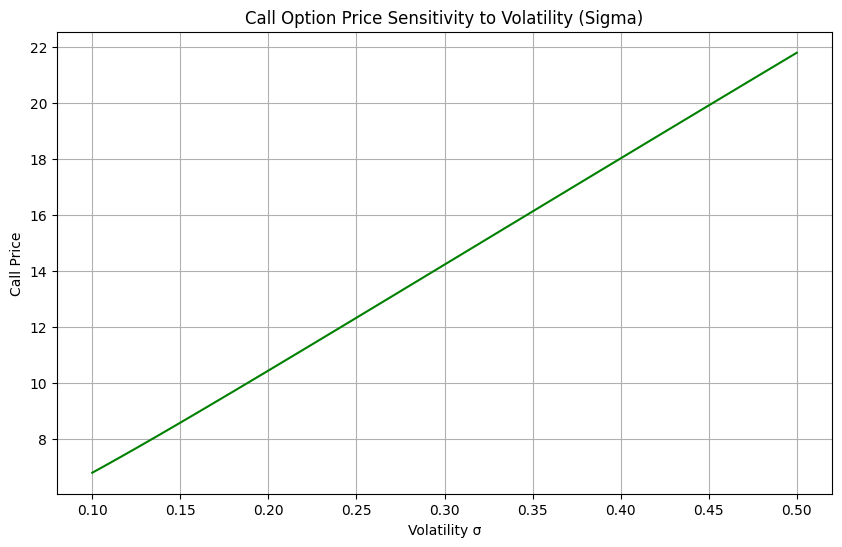

In [5]:
# ==============================================================
# Visualize how the option price changes with the stock price
# ==============================================================

# Create a range of possible stock prices around the current price
S_range = np.linspace(50, 150, 100)

# Calculate the option prices for each stock price in the range
call_prices = [black_scholes_price(S, K, T, r, sigma, 'call') for S in S_range]
put_prices = [black_scholes_price(S, K, T, r, sigma, 'put') for S in S_range]

# Plot the results
plt.figure(figsize=(10,6))
plt.plot(S_range, call_prices, label='Call Option Price', color='blue')
plt.plot(S_range, put_prices, label='Put Option Price', color='red')
plt.axhline(0, color='black', linestyle='--')  # Horizontal line at 0
plt.axvline(K, color='gray', linestyle='--', label='Strike Price')  # Strike price
plt.title('Black-Scholes Option Price vs Stock Price')
plt.xlabel('Stock Price ($S$)')
plt.ylabel('Option Price')
plt.legend()
plt.grid(True)
plt.show()

# ==============================================================
# Explore sensitivity: how Call price changes with volatility
# ==============================================================

# Define a range of volatilities from 10% to 50%
sigmas = np.linspace(0.1, 0.5, 50)
# Compute the call price for each volatility
call_vol_sensitivity = [black_scholes_price(S0, K, T, r, sigma, 'call') for sigma in sigmas]

# Plot the sensitivity
plt.figure(figsize=(10,6))
plt.plot(sigmas, call_vol_sensitivity, color='green')
plt.title('Call Option Price Sensitivity to Volatility (Sigma)')
plt.xlabel('Volatility σ')
plt.ylabel('Call Price')
plt.grid(True)
plt.show()


# How to Read the Graphs

## 1. Option Price vs Stock Price

- X-axis: Stock price (the current price of the underlying asset)
- Y-axis: Option price (calculated using Black-Scholes)
- Blue line: Call option price
- Red line: Put option price
- Vertical gray line: Strike price of the option (K)
- Horizontal black line: Price 0 reference

**Interpretation:**  
- When the stock price is below the strike, the call option is cheap and the put option is more valuable.  
- When the stock price rises above the strike, the call option becomes more valuable and the put option decreases.  

---

## 2. Call Option Price Sensitivity to Volatility

- X-axis: Volatility (σ) of the stock, as a decimal
- Y-axis: Call option price for each volatility level

**Interpretation:**  
- As volatility increases, the call option price also increases.  
- Higher volatility means more uncertainty, which increases the value of options because the chance of profitable movements is higher.

---

### Tips:

1. Check the legend to see which line corresponds to which option.  
2. Always look at the axes labels to understand what each axis represents.  
3. Reference lines (strike, price 0) help to identify key levels.  
4. In Jupyter, the plots are interactive, so you can zoom, pan, and save them.
